# Introduction to Statistics (week 3)

TODO: add short intro text here

A statistic of a random variable is a deterministic function of that random variable.

## Example 1: Wheel of Fortune

Suppose you spin a wheel of fortune many times. Each time, one of the numbers m_1, m_2, ..., m_n comes up with a probability p_1, p_2, ..., p_n, and this is how much money you would get from each spin. What amount of money do you expect to get per spin?

To help answer this question, write a function where you spin the wheel k times and compute the average amount received per spin.


41.98


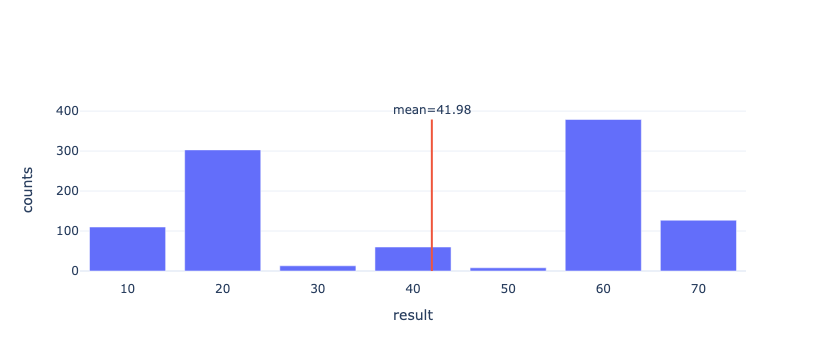

In [4]:
import numpy as np
from util import plot_many_values_with_mean

def spin_wheel(k: int):
    wheel = {10: 0.1, 20: 0.3, 30: 0.01, 40: 0.05, 50: 0.01, 60: 0.4, 70: 0.13}

    # TODO: code here
    
    return np.random.choice(list(wheel.keys()), size=k, p=list(wheel.values()))

    # end TODO


def compute_mean(sample_values):

    avg_result = None

    # TODO: code here
    
    avg_result = sum(sample_values) / sample_values.shape[0]

    # end TODO

    return avg_result

spin_results = spin_wheel(1000)
print(compute_mean(spin_results))
plot_many_values_with_mean(spin_results)

For the given wheel of fortune, write a function that will compute the mean value and how much the values are spread around the mean. The spread (variance) can be computed as follows:

- compute the mean
- for each value, compute how far off it is from the mean in either direction: use the squared difference for that
- compute the average of all the obtained differences

In [6]:
spin_results = spin_wheel(1000)

def mean_and_variance(values):

    # TODO: code here 

    mean = compute_mean(values)
    variance = sum([(val - mean) ** 2 for val in values]) / values.shape[0]

    return mean, variance

    # end TODO

mean_and_variance(spin_results)


(42.42, 489.14359999999755)

## Example 2: Iris dataset



<div style="display: flex; gap:10px;">
  <img src="https://images.unsplash.com/photo-1684154740753-00e1f0b3a7f1?q=80&w=2970&auto=format&fit=crop&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8fA%3D%3D" style="height:150px; float: left; margin-right: 10px" />
  <p>
    In 1936, a botanist Edgar Anderson measured the petal and sepal width and length of different species of the iris flower. He published the data - which unlikely became one of the most used datasets in statistics (and machine learning). This dataset includes the measurements of sepal width and length and petal width and length for three species of iris. </br></br>
  For this example, compute the mean and variance of sepal lengths using the procedure above.</p>
</div>



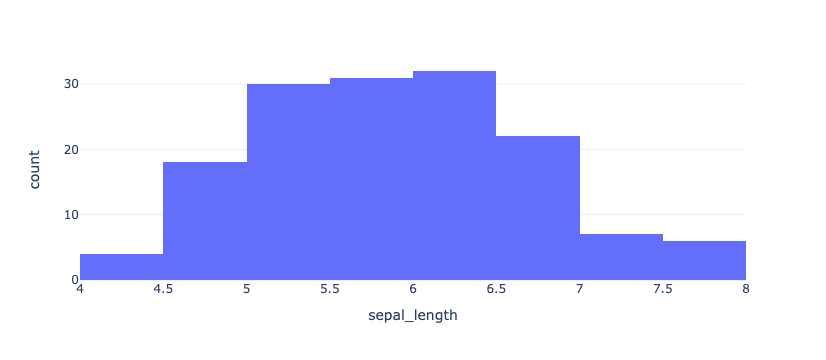

5.84
0.68


In [11]:
from util import get_iris_dataset
import plotly.express as px

dataset = get_iris_dataset()

fig = px.histogram(dataset, x='sepal_length')
fig.update_layout(template='plotly_white')
fig.show()

def compute_variance(sample_values):
    
    # TODO: code here

    mean = compute_mean(sample_values)
    variance = sum((el - mean)**2 for el in sample_values) / sample_values.shape[0]

    return variance

    # end TODO

print(round(compute_mean(dataset['sepal_length']), 2))
print(round(compute_variance(dataset['sepal_length']), 2))

Write functions that will, given the observations, answer the following questions:
- what is the most frequent sepal length in this dataset?
- if we sort all the values, what value is in the middle?

In [8]:
# What is the most frequent sepal length in this dataset?

def compute_mode(sample_values):

    # TODO: code here
    
    counts = {}
    for val in sample_values:
        if val in counts:
            counts[val] += 1
        else:
            counts[val] = 1
    
    max_value, max_count = None, -1
    for val, count in counts.items():
        if count > max_count:
            max_count = count
            max_value = val

    return max_value

    # end TODO

compute_mode(dataset['sepal_length'])

5.0

In [9]:
# If we sort all the values, which is the value in the middle?

def compute_median(sample_values):

    # TODO: code here
    
    if sample_values.shape[0] % 2 == 0:
        return sorted(sample_values)[sample_values.shape[0] // 2]
    else:
        return sum(sorted(sample_values)[sample_values.shape[0] - 1:sample_values.shape[0] + 1]) / 2

    # end TODO

print(sorted(dataset['sepal_length'].values))
compute_median(dataset['sepal_length'])

[4.3, 4.4, 4.4, 4.4, 4.5, 4.6, 4.6, 4.6, 4.6, 4.7, 4.7, 4.8, 4.8, 4.8, 4.8, 4.8, 4.9, 4.9, 4.9, 4.9, 4.9, 4.9, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.0, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.1, 5.2, 5.2, 5.2, 5.2, 5.3, 5.4, 5.4, 5.4, 5.4, 5.4, 5.4, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.5, 5.6, 5.6, 5.6, 5.6, 5.6, 5.6, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.7, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.8, 5.9, 5.9, 5.9, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.1, 6.1, 6.1, 6.1, 6.1, 6.1, 6.2, 6.2, 6.2, 6.2, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.3, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.4, 6.5, 6.5, 6.5, 6.5, 6.5, 6.6, 6.6, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.7, 6.8, 6.8, 6.8, 6.9, 6.9, 6.9, 6.9, 7.0, 7.1, 7.2, 7.2, 7.2, 7.3, 7.4, 7.6, 7.7, 7.7, 7.7, 7.7, 7.9]


5.8

### What if we want to inspect two (random) variables?

In this example, we want to examine the relationship between petal width and length in the dataset. 

Write a function that will compute a quantitative measure of this relationship:
- compute the mean for both variables
- for each observation, find a product of differences between the observation and the mean for both variables
- sum all the differences and divide them by the number of observations.

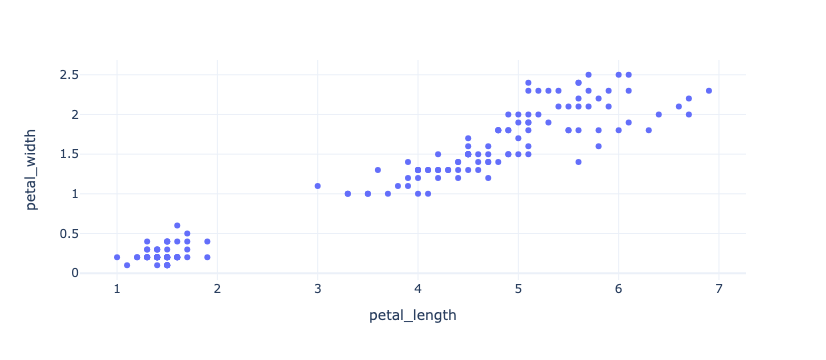

1.2877448888888892

In [58]:
fig = px.scatter(dataset, x='petal_length', y='petal_width')
fig.update_layout(template='plotly_white')
fig.show()

def compute_covariance(var1, var2):

    assert var1.shape[0] == var2.shape[0]
    observation_count = var1.shape[0]
    
    cov = None

    # TODO: code here
    
    var1_mean = compute_mean(var1)
    var2_mean = compute_mean(var2)

    cov = [(var1[i] - var1_mean) * (var2[i] - var2_mean) for i in range(observation_count)]
    cov = sum(cov) / observation_count

    # TODO: end
    
    return cov

compute_covariance(dataset['petal_length'], dataset['petal_width'])

Write a function that computes the same quantity as before, except that it normalizes it so that it ranges between -1 and 1.

In [59]:
def compute_correlation(var1, var2):
    assert var1.shape[0] == var2.shape[0]
    observation_count = var1.shape[0]
    
    corr = None

    # TODO: code here
    
    var1_variance = compute_variance(var1)
    var2_variance = compute_variance(var2)
    
    corr = compute_covariance(var1, var2) / np.sqrt(var1_variance * var2_variance)

    # TODO: end
    
    return corr

compute_correlation(dataset['petal_length'], dataset['petal_width'])

0.9627570970509667

What is the correlation between sepal length and width?

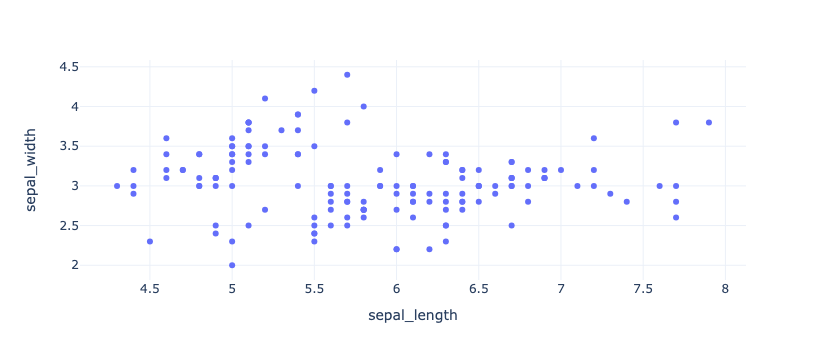

-0.10936924995064935

In [60]:
fig = px.scatter(dataset, x='sepal_length', y='sepal_width')
fig.update_layout(template='plotly_white')
fig.show()

compute_correlation(dataset['sepal_length'], dataset['sepal_width'])

# Example 3: Correlation

Write functions that will simulate two random variables that:

- have correlation close to 0 but one is a function of another
- have correlation close to -1
- have correlation close to 1

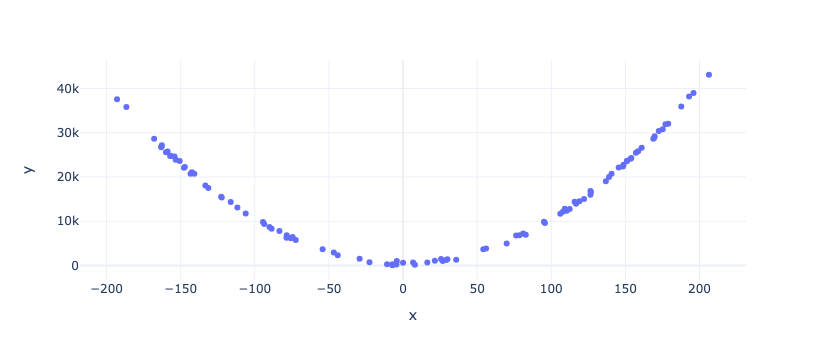

Correlation for case 1 with quadratic function: 0.14921209325078907


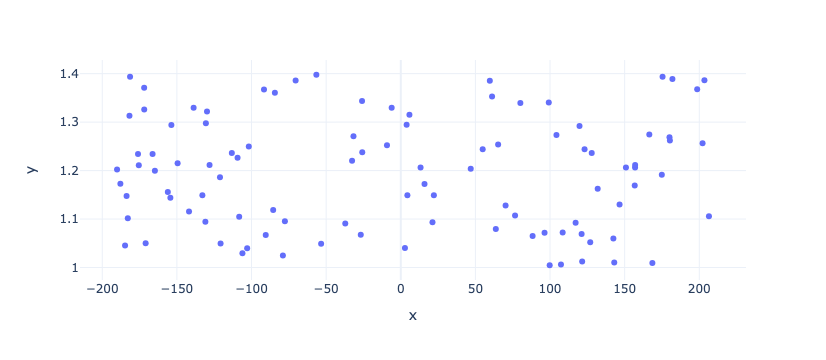

Correlation for case 1 with linear function: -0.017777864873686322


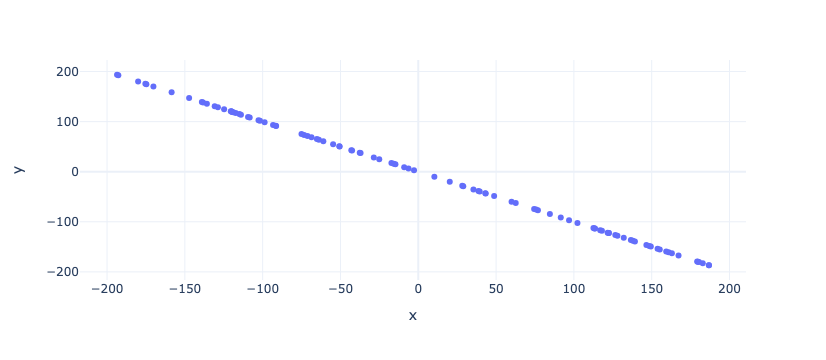

Correlation for case 2: -1.0


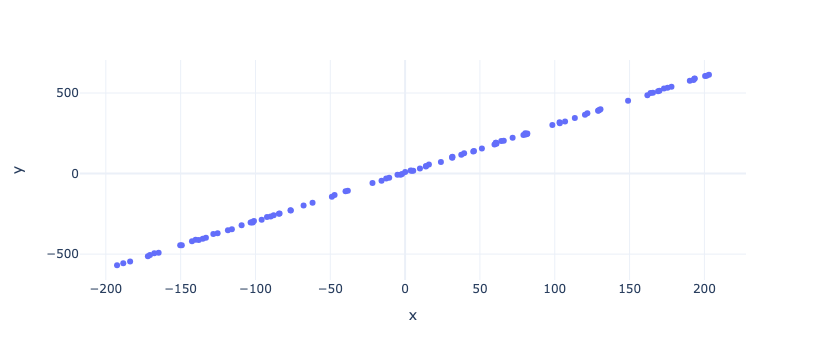

Correlation for case 3: 0.9999666615216192


In [65]:
def plot_data(x, y):

    fig = px.scatter(x=x, y=y)
    fig.update_layout(template='plotly_white')
    fig.show()

# TODO: code here

def simulate_vars_1_quadratic():
    sample_size = 100
    
    x = np.random.uniform(-200, 200, sample_size) + np.random.uniform(0,10,sample_size)
    y = x**2 + np.random.uniform(0,1000,sample_size)

    plot_data(x, y)

    print(f"Correlation for case 1 with quadratic function: {compute_correlation(x, y)}")

simulate_vars_1_quadratic()

def simulate_vars_1_linear():
    sample_size = 100
    
    x = np.random.uniform(-200, 200, sample_size) + np.random.uniform(0,10,sample_size)
    y = np.ones(sample_size) + np.random.uniform(0,0.4,sample_size)

    plot_data(x, y)

    print(f"Correlation for case 1 with linear function: {compute_correlation(x, y)}")

simulate_vars_1_linear()

def simulate_vars_2():
    sample_size = 100

    x = np.random.uniform(-200, 200, sample_size) + np.random.uniform(0, 10, sample_size)
    y = -x 

    plot_data(x, y)

    print(f"Correlation for case 2: {compute_correlation(x, y)}")

simulate_vars_2()

def simulate_vars_3():
    sample_size = 100

    x = np.random.uniform(-200, 200, sample_size) + np.random.uniform(0, 10, sample_size)
    y = 3*x + np.random.uniform(0, 10, sample_size)

    plot_data(x, y)

    print(f"Correlation for case 3: {compute_correlation(x, y)}")

simulate_vars_3()

# TODO: end

## Example 3: The quiz problem

Consider a quiz game where a person is given two questions and must decide which one to answer first. Question 1 will be answered correctly with a probability of 0.8 and the person will then receive a prize of 1000 NOK, while question 2 will be answered correctly with a probability of 0.5, and the person will then receive a prize of 2000 NOK. If the first question attempted is answered incorrectly, the quiz terminates, i.e., the person is not allowed to attempt the second question. If the first question is answered correctly, the person is allowed to attempt the second question. Which question should be answered first to maximize the expected value of the total prize money received?

Write a function that will determine which question should be answered first.

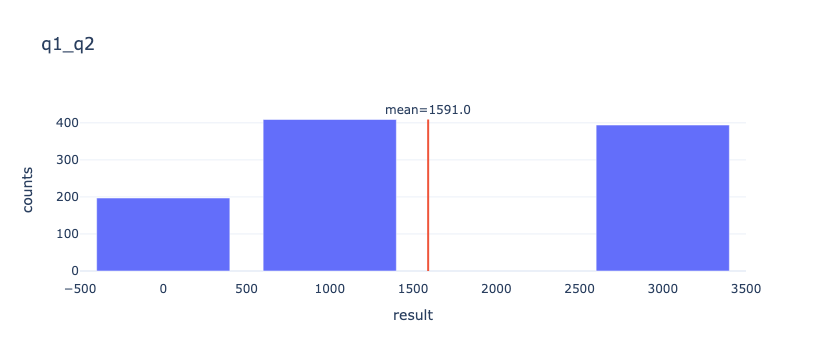

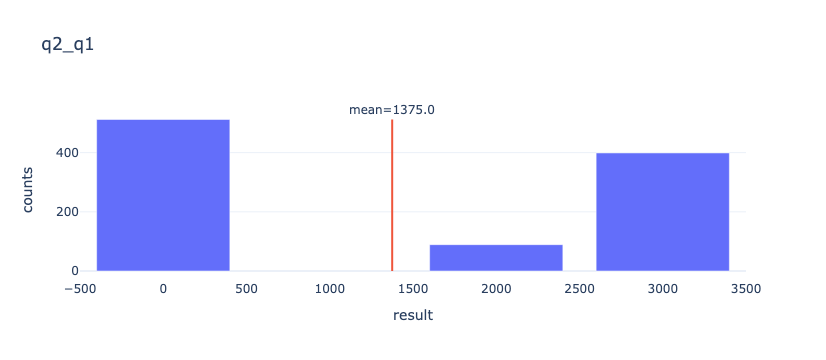

{'q1_q2': 1591.0, 'q2_q1': 1375.0}

In [2]:
import random 

# TODO: code here

correct_answer_probs = {'q1': 0.8, 'q2': 0.5}
prizes = {'q1': 1000, 'q2': 2000}

def simulate_one_quiz_run(correct_answer_probs: dict, prizes: dict, answer_sequence: list) -> int:
    if random.uniform(0, 1) < correct_answer_probs[answer_sequence[0]]:
        if random.uniform(0, 1) < correct_answer_probs[answer_sequence[1]]:
            return sum(prizes.values())
        else:
            return prizes[answer_sequence[0]]
    else:
        return 0

def quiz_problem(correct_answer_probs: dict, prizes: dict, num_experiments: int):
    
    answer_sequences = [['q1', 'q2'], ['q2', 'q1']]
    expected_prizes = {}
    
    for answer_sequence in answer_sequences:
        all_prizes = [simulate_one_quiz_run(correct_answer_probs, prizes, answer_sequence) for _ in range(num_experiments)]

        plot_many_values_with_mean(all_prizes, plot_title="_".join(answer_sequence))
        
        expected_prizes["_".join(answer_sequence)] = sum(all_prizes) / num_experiments

    return expected_prizes
            
quiz_problem(correct_answer_probs, prizes, 1000)

# end TODO

Here we computed the expected values for the two scenarios. What are the corresponding random variables?